In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import seaborn as sns
import matplotlib
from matplotlib import rcParams
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from tqdm import tqdm
import sklearn
from sklearn import metrics

In [2]:
plt.style.use("seaborn-dark")
rcParams["figure.figsize"] = [12, 6]
rcParams["figure.dpi"] = 150
rcParams["axes.grid"] = True
rcParams["axes.linewidth"] = 0.8
rcParams["grid.alpha"] = 0.6

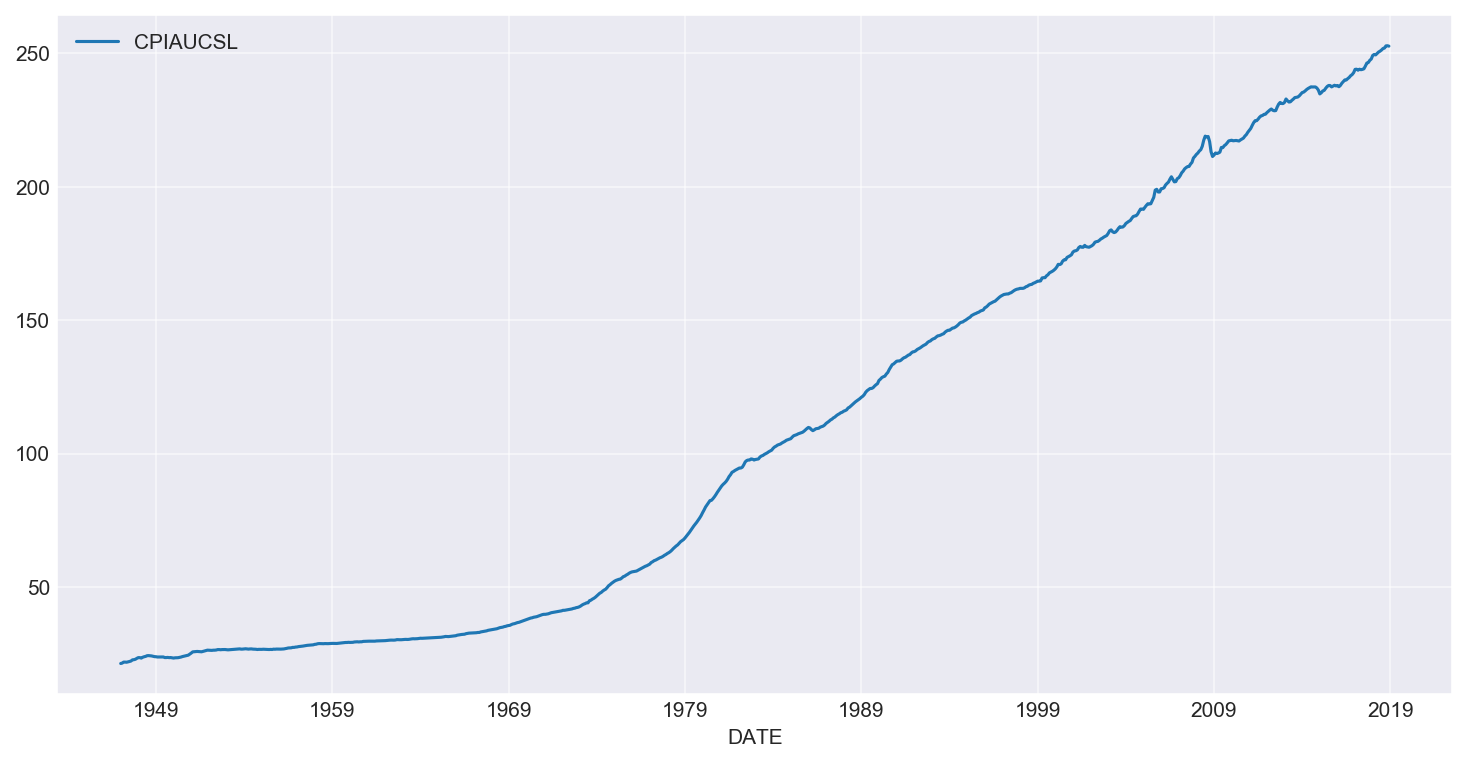

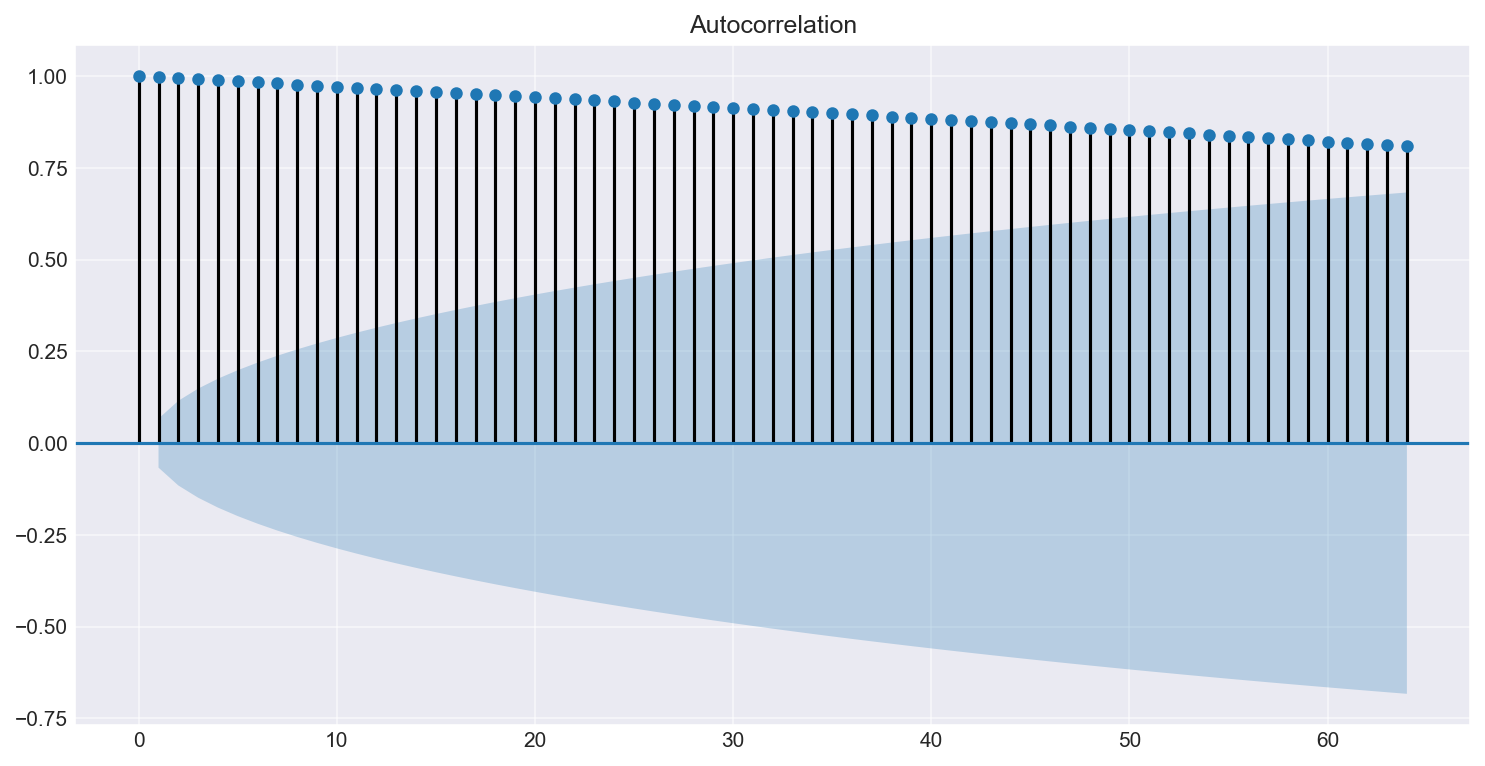

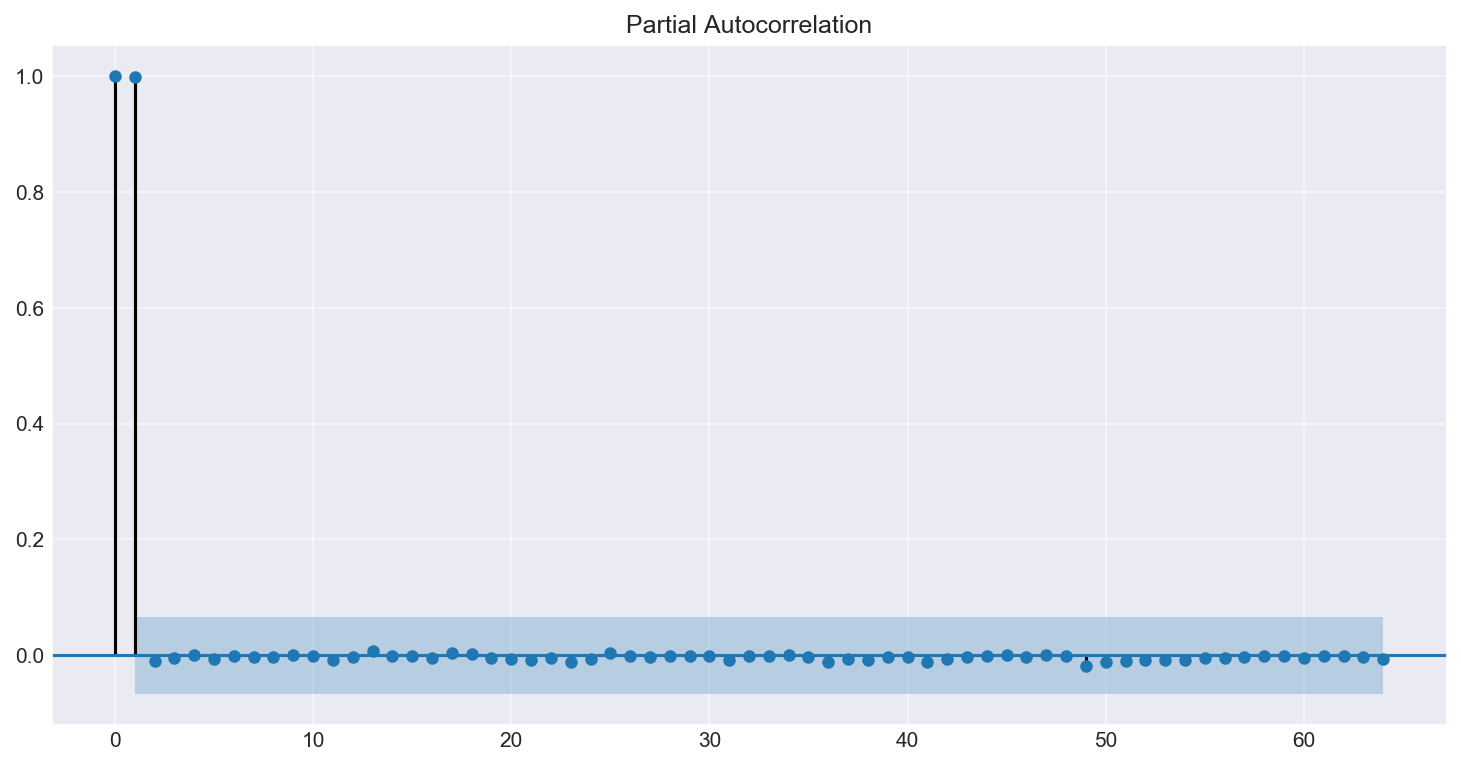

In [34]:
df = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
df.dropna(inplace=True)
df.plot()
plt.show()
tsa.graphics.plot_acf(df, lags=64)
plt.show()
tsa.graphics.plot_pacf(df, lags=64)
plt.show()

In [26]:
# Fit the model.
model = tsa.ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  863
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -259.213
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 25 Feb 2019   AIC                            532.427
Time:                        21:26:41   BIC                            565.750
Sample:                    02-01-1947   HQIC                           545.182
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2671      0.026     10.128      0.000       0.215       0.319
ar.L1.D.CPIAUCSL     0.5656      0.034     16.618      0.000       0.499       0.632
ar.L2.D.CPIAUCSL    -0.1332 

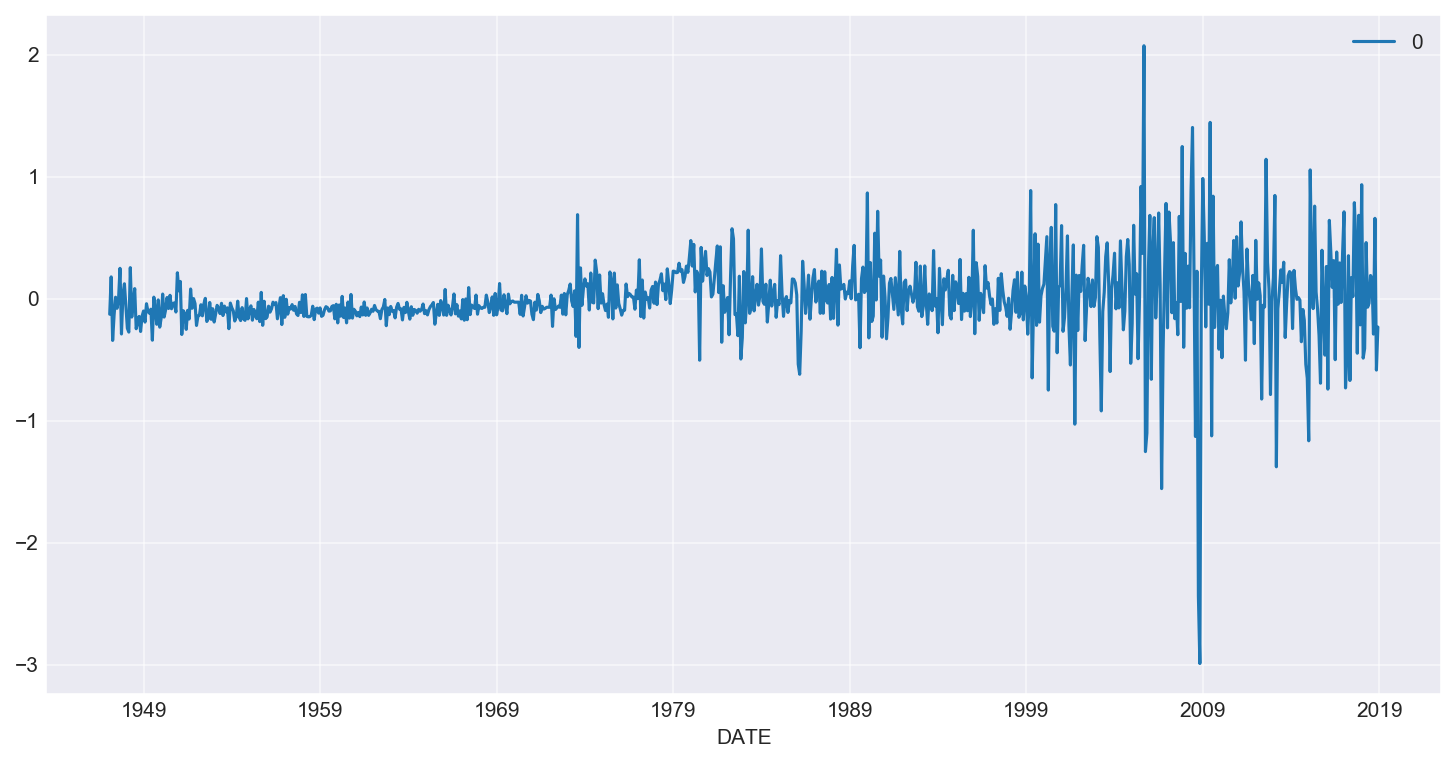

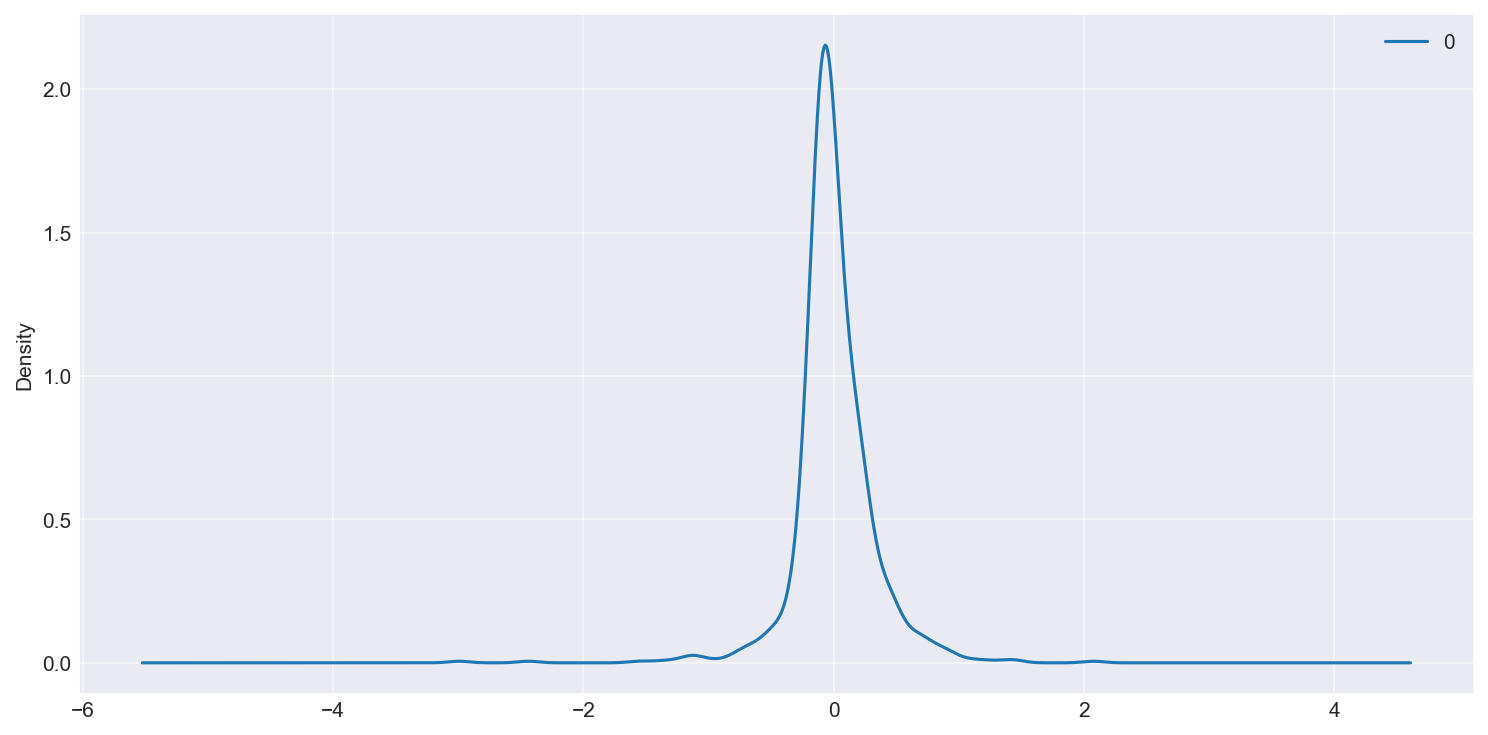

In [27]:
# Residual plot
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind="kde")
plt.show()

100%|██████████| 87/87 [00:04<00:00, 19.08it/s]


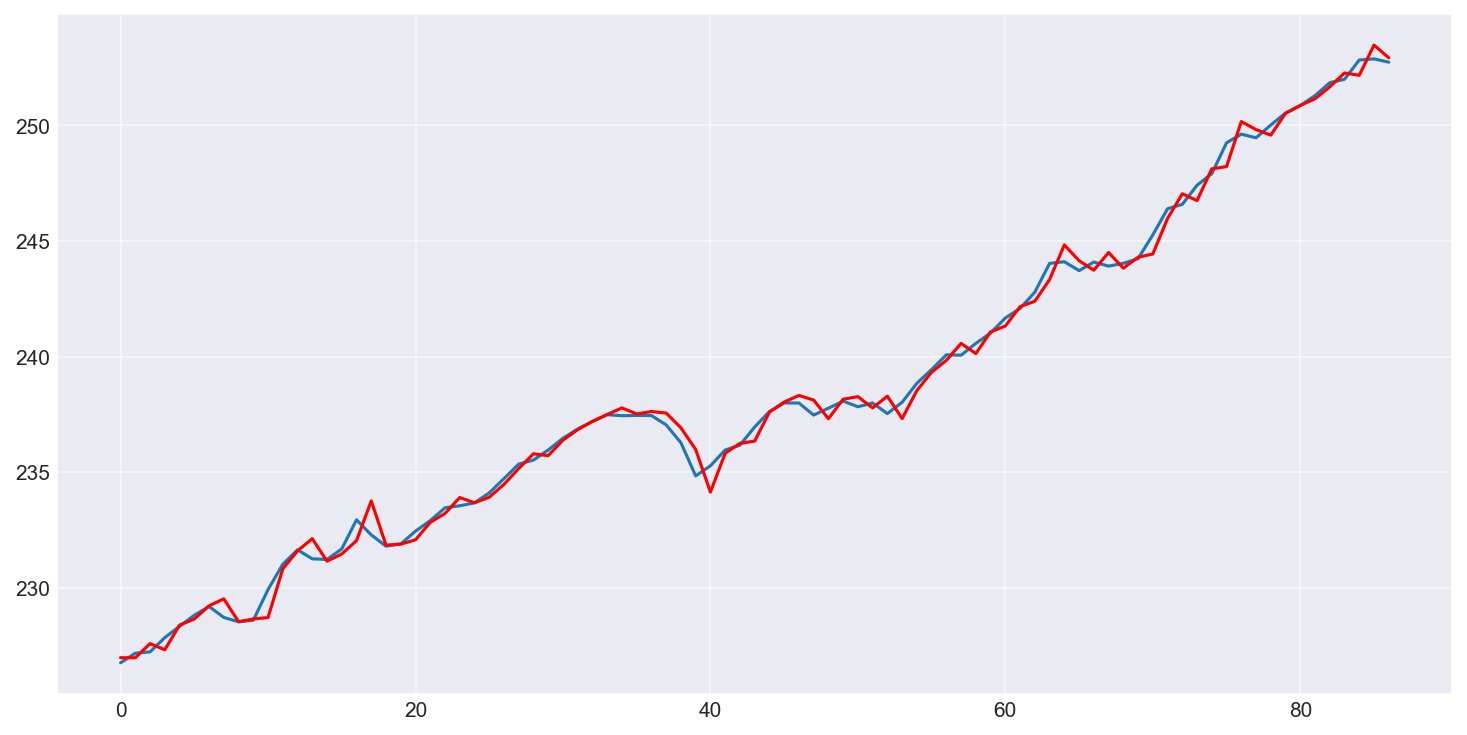

Final MSE: 0.22734007590384414


In [37]:
# Recursive Scheme Forecasting
size = int(len(df) * 0.9)
train, test = np.squeeze(df.values[:size]), np.squeeze(df.values[size:])
hist = [x for x in train]
pred = list()

for t in tqdm(range(len(test))):
    model = tsa.ARIMA(hist, order=(3, 1, 0))
    model_fit = model.fit(disp=False)
    # Triple format: (point_estimate, standard error, C.I.)
    fc_tripe = model_fit.forecast()
    fc_one_step = fc_tripe[0]
    pred.append(fc_one_step)
    # Add the ground truth for next period forecasting
    hist.append(test[t])
mse = metrics.mean_squared_error(test, pred)
plt.plot(test)
plt.plot(pred, color="red")
plt.show()
print(f"Final MSE: {mse}")